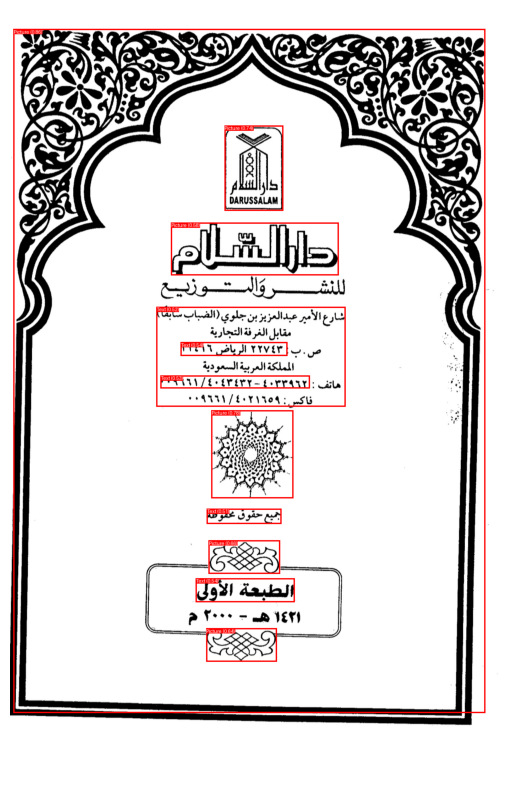

In [33]:
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from transformers import RTDetrForObjectDetection, RTDetrImageProcessor

# Load processor and model
image_processor = RTDetrImageProcessor.from_pretrained("HuggingPanda/docling-layout")
model = RTDetrForObjectDetection.from_pretrained("HuggingPanda/docling-layout")

# Load image
image_path = "/Users/maryamsaad/Documents/arabic-ocr-transformer/test5.png"
image = Image.open(image_path).convert("RGB")

# Preprocess
resize = {"height": 640, "width": 640}
inputs = image_processor(images=image, return_tensors="pt", size=resize)

# Inference
with torch.no_grad():
    outputs = model(**inputs)

# Postprocess
results = image_processor.post_process_object_detection(
    outputs,
    target_sizes=torch.tensor([image.size[::-1]]),
    threshold=0.5
)

# Draw results
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score = score.item()
        label = model.config.id2label.get(label_id.item() + 1, "Unknown")
        box = [round(i, 2) for i in box.tolist()]
        x0, y0, x1, y1 = box

        # Draw bounding box
        draw.rectangle([x0, y0, x1, y1], outline="red", width=3)

        # Prepare text and background
        text = f"{label} ({score:.2f})"
        bbox = draw.textbbox((x0, y0), text, font=font)
        draw.rectangle(bbox, fill="red")
        draw.text((x0, y0), text, fill="white", font=font)

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()


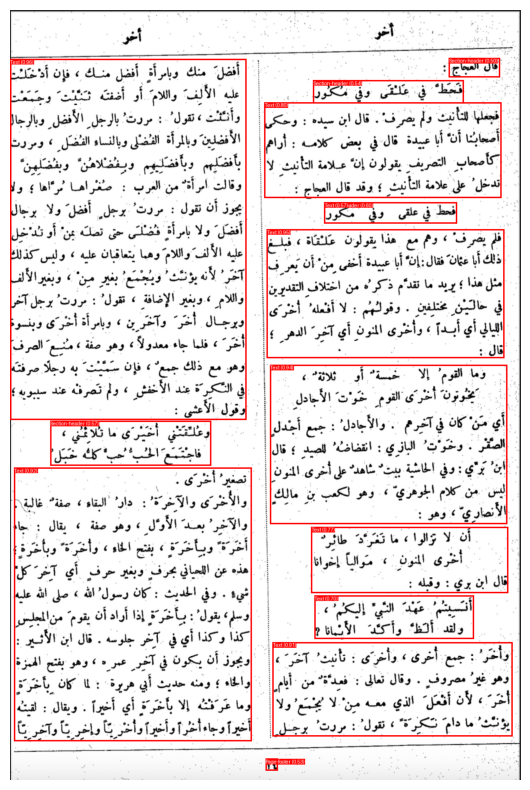

In [34]:
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from transformers import RTDetrForObjectDetection, RTDetrImageProcessor

# Load processor and model
image_processor = RTDetrImageProcessor.from_pretrained("HuggingPanda/docling-layout")
model = RTDetrForObjectDetection.from_pretrained("HuggingPanda/docling-layout")

# Load image
image_path = "/Users/maryamsaad/Documents/arabic-ocr-transformer/ttest.png"
image = Image.open(image_path).convert("RGB")

# Preprocess
resize = {"height": 640, "width": 640}
inputs = image_processor(images=image, return_tensors="pt", size=resize)

# Inference
with torch.no_grad():
    outputs = model(**inputs)

# Postprocess
results = image_processor.post_process_object_detection(
    outputs,
    target_sizes=torch.tensor([image.size[::-1]]),
    threshold=0.5
)

# Draw results
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score = score.item()
        label = model.config.id2label.get(label_id.item() + 1, "Unknown")
        box = [round(i, 2) for i in box.tolist()]
        x0, y0, x1, y1 = box

        # Draw bounding box
        draw.rectangle([x0, y0, x1, y1], outline="red", width=3)

        # Prepare text and background
        text = f"{label} ({score:.2f})"
        bbox = draw.textbbox((x0, y0), text, font=font)
        draw.rectangle(bbox, fill="red")
        draw.text((x0, y0), text, fill="white", font=font)

# Display result
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()
